<a href="https://colab.research.google.com/github/jcdumlao14/CloudcreditsTechnologies-Data-Science-Internship/blob/main/Project_6_Movie_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # **Project 6 : Movie Recommendation System**

## **📝 Description:**

*Build a recommendation system that suggests movies to users based on their viewing history and preferences. Use collaborative filtering, content-based filtering, or a hybrid approach. Visualize user preferences and recommendation accuracy.*


## **🔧 Project Structure:**

1. **🧠 Define the Problem:** Understand the objective and type of problem (classification, regression, etc.).
2. **🗂️ Collect and Prepare Data:** Obtain the dataset, handle missing values, and preprocess data.
3. **📊 Exploratory Data Analysis (EDA):** Visualize data to understand patterns and correlations.
4. **📐 Feature Engineering:** Select and create relevant features.
5. **🔀 Split the Data:** Divide the dataset into training and testing sets.
6. **🤖 Choose a Model:** Select a suitable machine learning algorithm.
7. **🏋️ Train the Model:** Train the model using the training set.
8. **📈 Evaluate the Model:** Use appropriate metrics to evaluate the model on the test set.
9. **🔧 Improve the Model:** Tune hyperparameters, try different algorithms, or enhance features.
10. **🚀 Deploy the Model (optional):** Create an application or API to make predictions using the trained model.


##  **🧪 I’ll experiment with:**

*   **Collaborative Filtering:** Using KNN to find similar users and predict ratings based on their preferences.
*   **Content-Based Filtering:** Using TF-IDF and cosine similarity to recommend movies similar to those a user has liked.
*   **Hybrid Approach:** Combining collaborative and content-based filtering for potentially better recommendations, focusing on weighted averaging techniques.
*   **Model Improvement:** Hyperparameter tuning for KNN, and experimenting with other collaborative filtering algorithms.
*   **Feature engineering:** I'll look into adding movie plot summaries as features.

#  **1. 🧠 Define the Problem**

- We aim to build a movie recommendation system.  This is primarily a prediction problem
- where we want to predict the rating a user would give a movie they haven't seen.
- We'll explore collaborative and content-based filtering approaches.



# **Data Source: [Bengali Movie Dataset](https://www.kaggle.com/datasets/jocelyndumlao/bengali-movie-dataset)**



## **Import Libraries**

- **pandas:** Used for working with data in tables (DataFrames).
- **numpy:** Used for numerical operations, especially for handling arrays and matrices.
- **sklearn.model_selection.train_test_split**: Used to split your data into training and testing sets so you can evaluate how well your recommendation system works.
- **sklearn.metrics.mean_squared_error:** Used to calculate the error in your model for example, how far off the predicted ratings are from the actual ratings.
- **sklearn.feature_extraction.text.TfidfVectorizer:** Used to convert text data (like movie genres or descriptions) into numbers that the computer can understand, this is the Content-Based Filtering.
- **sklearn.metrics.pairwise.linear_kernel:** Used to measure how similar movies are to each other based on their text descriptions, again for Content-Based Filtering.
- **sklearn.neighbors.NearestNeighbors:** Used to find users who are similar to each other based on their movie ratings, this is the base for Collaborative Filtering.
- **matplotlib.pyplot:** Used to create plots and graphs to visualize your data and results.
- **seaborn:** Another library for creating more visually appealing plots and graphs.
- **scipy.sparse.csr_matrix:** Used to efficiently store and work with large matrices that have many zero values (which is common in collaborative filtering).

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse import csr_matrix

import warnings
warnings.filterwarnings("ignore")

# **2. 🗂️Collect and Prepare Data**
- Download the files from kagglehub dataset
- The data are contained in the files movies.csv and ratings.csv.

## **2.1.📥 Download the Files**

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jocelyndumlao/bengali-movie-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/bengali-movie-dataset


### ***Note: just run twice to show path to dataset files***

## **2.3. 🗂️ Check Files in Subfolder**
- To explore the subdirectory:

In [3]:
import os

dataset_path = "/kaggle/input/bengali-movie-dataset"
subfolder = os.listdir(dataset_path)[0]  # likely 'Bengali Movie Dataset'
full_path = os.path.join(dataset_path, subfolder)
files = os.listdir(full_path)

print("Subfolder name:", subfolder)
print("Files in subfolder:", files)


Subfolder name: Bengali Movie Dataset
Files in subfolder: ['movies.csv', 'ratings.csv']


## **2.4. 📥 Read the CSV Files**

Once you've confirmed the filenames inside the subfolder (movies.csv, ratings.csv)

In [4]:
import pandas as pd

movies_df = pd.read_csv(f"{full_path}/movies.csv")
ratings_df = pd.read_csv(f"{full_path}/ratings.csv")


In [5]:
movies_df.rename(columns=lambda x: x.strip(), inplace=True)  # Strip all column names

In [6]:
print(movies_df.shape)
movies_df.head().style.background_gradient(cmap='YlOrRd_r')

(381, 6)


,platform_Name,movieId,title,genres,director,starring
0,Chorki,1,SHUKLOPOKKHO,ROMANTIC THRILLER,Vicky Zahed,"Khairul Basar, Sunerah Binte Kamal, Ziaul Roshan, Faruk ahmed, Sharif Siraj, Abdullah Shentu"
1,Chorki,2,SHILPI,DRAMA,Agragami,"Uttam Kumar, Suchitra Sen"
2,Chorki,3,SHAREY CHUATTOR,DRAMA,Nirmal Dey,"Uttam Kumar, Suchitra Sen, Tulsi Chakraborty"
3,Chorki,4,SAGARIKA,DRAMA,Agragami,"Uttam Kumar, Suchitra Sen, Jamuna Sinha, Namita Sinha"
4,Chorki,5,DEEP JWELEY JAI,DRAMA,Asit Sen,"Suchitra Sen, Tulsi Chakraborty, Ajit Chatterjee, Anil Chatterjee"


In [7]:
print(ratings_df.shape)
ratings_df.head().style.background_gradient(cmap='YlOrRd_r')

(105156, 4)


,userId,movieId,rating,timestamp
0,1,1,4.000000,1217897793
1,1,2,1.500000,1217895807
2,1,3,4.000000,1217896246
3,1,4,4.000000,1217896556
4,1,5,4.000000,1217896523


In [8]:
movies_df.columns

Index(['platform_Name', 'movieId', 'title', 'genres', 'director', 'starring'], dtype='object')

In [9]:
ratings_df.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [10]:
# Handling Missing values
print("\nMissing Values in Movies DataFrame:")
movies_df.isnull().sum()


Missing Values in Movies DataFrame:


,0
platform_Name,0
movieId,0
title,0
genres,0
director,158
starring,9


In [11]:
print("\nMissing Values in Ratings DataFrame:")
ratings_df.isnull().sum()


Missing Values in Ratings DataFrame:


,0
userId,0
movieId,0
rating,0
timestamp,0


## **🧹Data Cleaning and Preprocessing**

- **Handle Missing Values:** Check if we have any missing data in our movie and ratings DataFrames. If there are, fill them with a default value (like "Unknown" for movie director/stars) or remove the rows/columns with missing data.
- **Check Data Types:** Make sure the columns in our DataFrames have the correct data types. For example, movie IDs and user IDs should be integers.
- **Convert platform_name to categorical:** Convert platform_name to categorical because this type is most efficient because it uses less memory and can increase performance.

In [12]:
# Handle missing values (Imputation or Removal)
# For simplicity, we'll fill missing values in 'director' and 'starring' with 'Unknown'
movies_df['director'] = movies_df['director'].fillna('Unknown')
movies_df['starring'] = movies_df['starring'].fillna('Unknown')


In [13]:
#Check data types
print("\nData Types in Movies DataFrame:")
print(movies_df.dtypes)
print("\nData Types in Ratings DataFrame:")
print(ratings_df.dtypes)



Data Types in Movies DataFrame:
platform_Name    object
movieId           int64
title            object
genres           object
director         object
starring         object
dtype: object

Data Types in Ratings DataFrame:
userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object


In [14]:
# Convert platform_name to categorical
movies_df['platform_Name'] = movies_df['platform_Name'].astype('category')


# **3. 📊 Exploratory Data Analysis (EDA)**

We Look at our data to understand it better. This usually involves making plots and calculating statistics:

- **Rating Distribution:** How many ratings of each type (1 star, 2 stars, etc.) are there?
- **Movies per Platform:** How many movies available on each platform?
- **Most Common Genres:** Which movie genres are the most popular?
- **Popular Movies:** Which movies have the most ratings?
- **Highly Rated Movies:** Which movies have the highest average ratings?
- **User Rating Distribution:** How many movies has each user rated?
- **Rating over Time:** How do average ratings change over time?

## **3.1. Distribution of Movie Ratings**

Ratings Distribution:
 rating
0.5     1193
1.0     3242
1.5     1550
2.0     7901
2.5     5430
3.0    21618
3.5    12193
4.0    28808
4.5     8206
5.0    15015
Name: count, dtype: int64


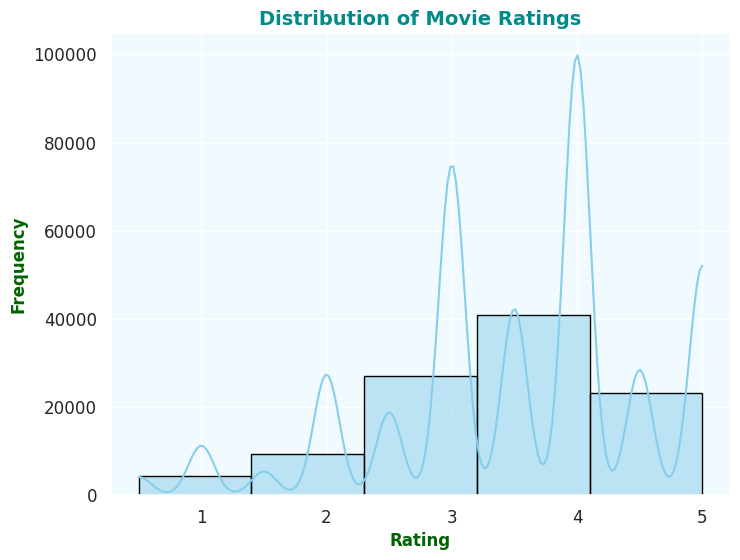

In [15]:
# Apply global seaborn theme
sns.set_theme(palette="pastel", font_scale=1.1)

# Distribution of Movie Ratings:
print("Ratings Distribution:\n", ratings_df['rating'].value_counts().sort_index())
plt.figure(figsize=(8, 6))
sns.histplot(ratings_df['rating'], bins=5, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Movie Ratings', fontsize=14, fontweight='bold', color='darkcyan')
plt.xlabel('Rating', fontsize=12, fontweight='bold', color='darkgreen')
plt.ylabel('Frequency', fontsize=12, fontweight='bold', color='darkgreen')
plt.gca().set_facecolor('#f0faff')
plt.show()

## **3.2. Number of Movies per Platform**

Movies per Platform:
 platform_Name
Hoichoi    218
Chorki     163
Name: count, dtype: int64


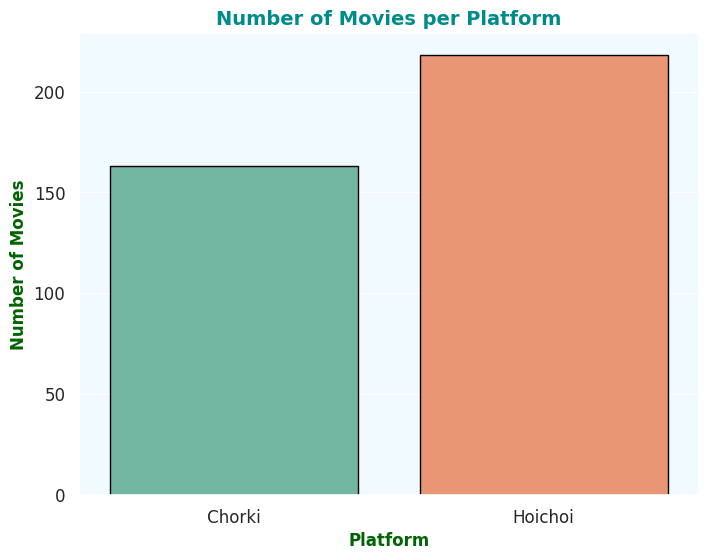

In [16]:
# Number of Movies per Platform:
platform_counts = movies_df['platform_Name'].value_counts()
print("Movies per Platform:\n", platform_counts)
plt.figure(figsize=(8, 6))
sns.barplot(x=platform_counts.index, y=platform_counts.values, palette='Set2', edgecolor='black')
plt.title('Number of Movies per Platform', fontsize=14, fontweight='bold', color='darkcyan')
plt.xlabel('Platform', fontsize=12, fontweight='bold', color='darkgreen')
plt.ylabel('Number of Movies', fontsize=12, fontweight='bold', color='darkgreen')
plt.gca().set_facecolor('#f0faff')
plt.show()

## **3.3. Distribution of genres**

Top 10 Genre Counts:
 genres
DRAMA              96
Thriller           43
Drama              40
Comedy             27
Horror             20
Crime, Thriller    18
COMEDY             10
THRILLER            9
Drama, Romance      9
Romance             9
Name: count, dtype: int64


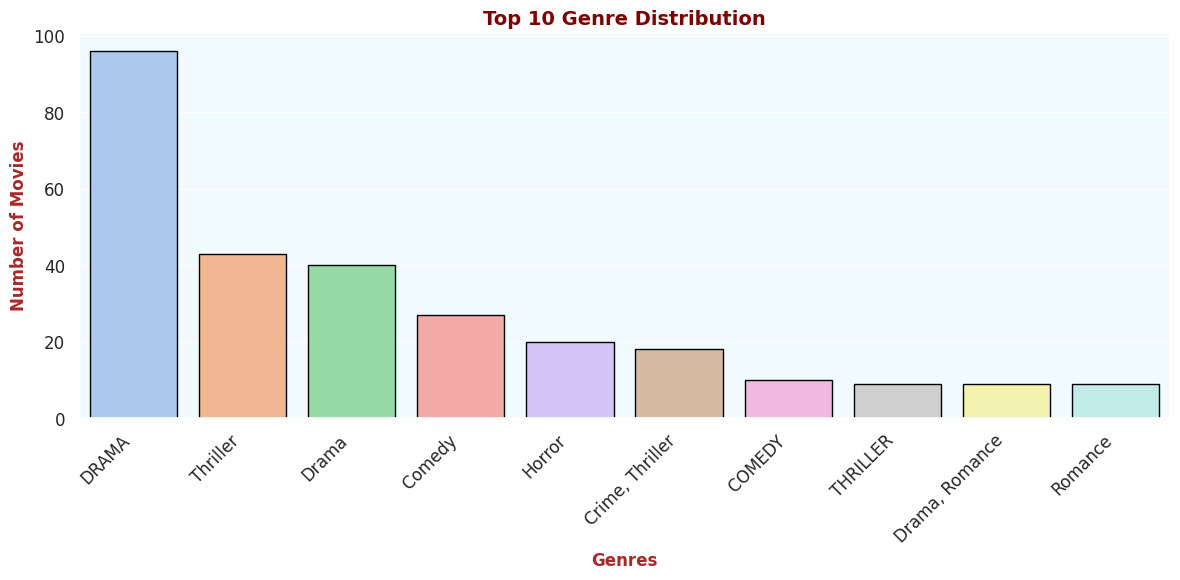

In [17]:
# Distribution of genres
genre_counts = movies_df['genres'].value_counts().head(10)
print("Top 10 Genre Counts:\n", genre_counts)

plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='pastel', edgecolor='black')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Genre Distribution', fontsize=14, fontweight='bold', color='maroon')
plt.xlabel('Genres', fontsize=12, fontweight='bold', color='brown')
plt.ylabel('Number of Movies', fontsize=12, fontweight='bold', color='brown')
plt.tight_layout()
plt.gca().set_facecolor('#f0faff')
plt.show()

## **3.4. Most Popular Movies (based on number of ratings)**

Top 10 Most Popular Movie IDs and Their Rating Counts:
 movieId
381    276
1      276
2      276
3      276
4      276
5      276
6      276
7      276
8      276
9      276
Name: count, dtype: int64


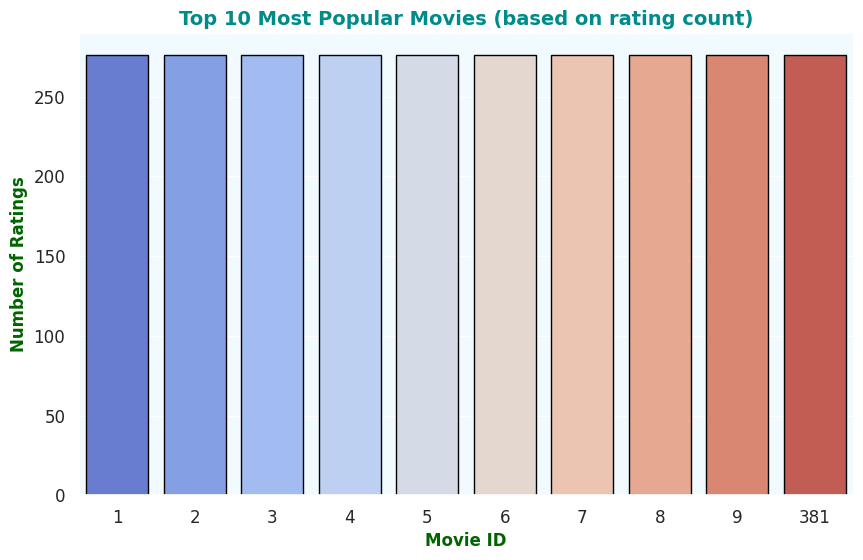

In [18]:
# Most Popular Movies (based on number of ratings):
movie_popularity = ratings_df['movieId'].value_counts().head(10)
print("Top 10 Most Popular Movie IDs and Their Rating Counts:\n", movie_popularity)

plt.figure(figsize=(10, 6))
sns.barplot(x=movie_popularity.index, y=movie_popularity.values, palette='coolwarm', edgecolor='black')
plt.title('Top 10 Most Popular Movies (based on rating count)', fontsize=14, fontweight='bold', color='darkcyan')
plt.xlabel('Movie ID', fontsize=12, fontweight='bold', color='darkgreen')
plt.ylabel('Number of Ratings', fontsize=12, fontweight='bold', color='darkgreen')
plt.gca().set_facecolor('#f0faff')
plt.show()

## **3.5. Average Rating per Movie**

Top 10 Movies by Average Rating:
 movieId
174    4.764493
170    3.663043
133    3.637681
131    3.637681
180    3.634058
253    3.634058
120    3.628623
254    3.626812
7      3.625000
62     3.625000
Name: rating, dtype: float64


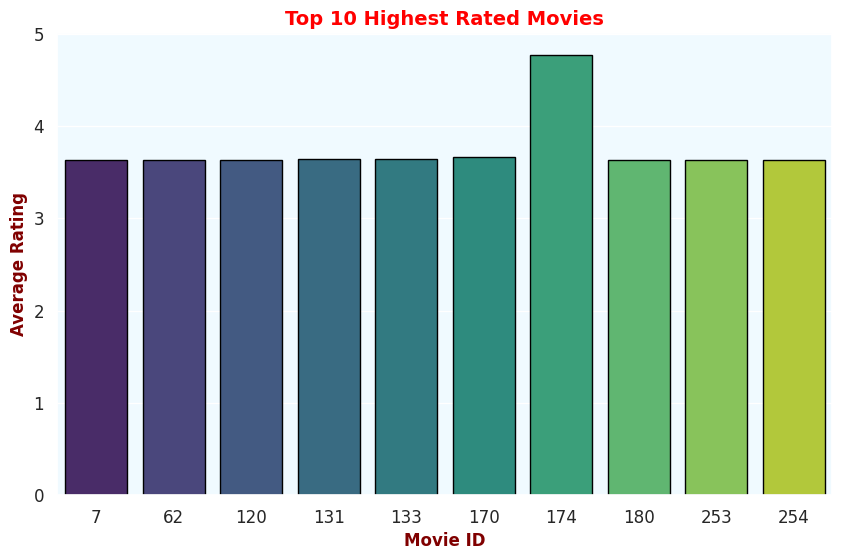

In [19]:
# Average Rating per Movie
avg_ratings = ratings_df.groupby('movieId')['rating'].mean()
top_rated_movies = avg_ratings.sort_values(ascending=False).head(10)
print("Top 10 Movies by Average Rating:\n", top_rated_movies)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_rated_movies.index, y=top_rated_movies.values, palette='viridis', edgecolor='black')
plt.title('Top 10 Highest Rated Movies', fontsize=14, fontweight='bold', color='red')
plt.xlabel('Movie ID', fontsize=12, fontweight='bold', color='maroon')
plt.ylabel('Average Rating', fontsize=12, fontweight='bold', color='maroon')
plt.gca().set_facecolor('#f0faff')
plt.show()

## **3.6. Distribution of User Ratings**

User Rating Counts:
 count     668.000000
mean      157.419162
std       315.019189
min        20.000000
25%        35.000000
50%        70.500000
75%       153.000000
max      5495.000000
Name: count, dtype: float64


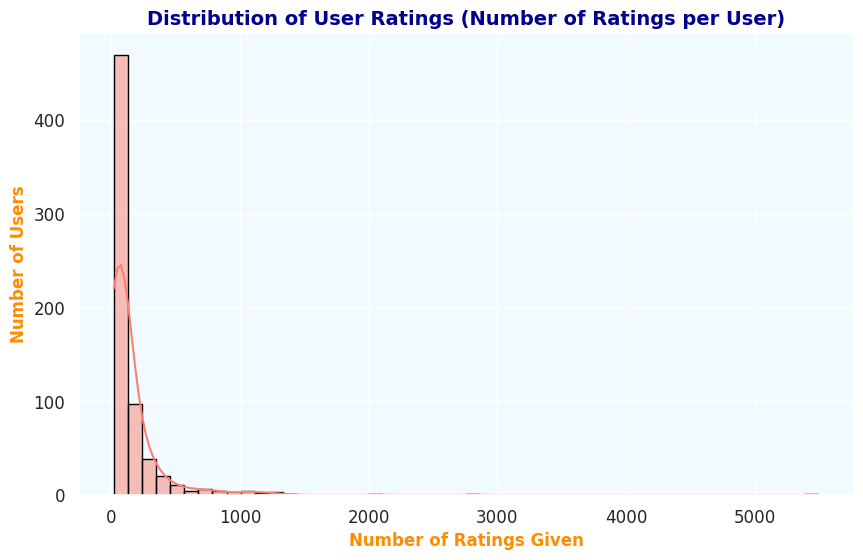

In [20]:
# Distribution of User Ratings (number of ratings given by each user):
user_ratings = ratings_df['userId'].value_counts()
print("User Rating Counts:\n", user_ratings.describe())
plt.figure(figsize=(10, 6))
sns.histplot(user_ratings, bins=50, kde=True, color='salmon', edgecolor='black')
plt.title('Distribution of User Ratings (Number of Ratings per User)', fontsize=14, fontweight='bold', color='darkblue')
plt.xlabel('Number of Ratings Given', fontsize=12, fontweight='bold', color='darkorange')
plt.ylabel('Number of Users', fontsize=12, fontweight='bold', color='darkorange')
plt.gca().set_facecolor('#f0faff')
plt.show()

## **3.7. Rating vs Time**

Average Ratings Over Time (sample):
 datetime
1996-04-03    3.875000
1996-04-06    4.117647
1996-04-09    3.954545
1996-04-23    3.772727
1996-04-24    4.000000
Name: rating, dtype: float64


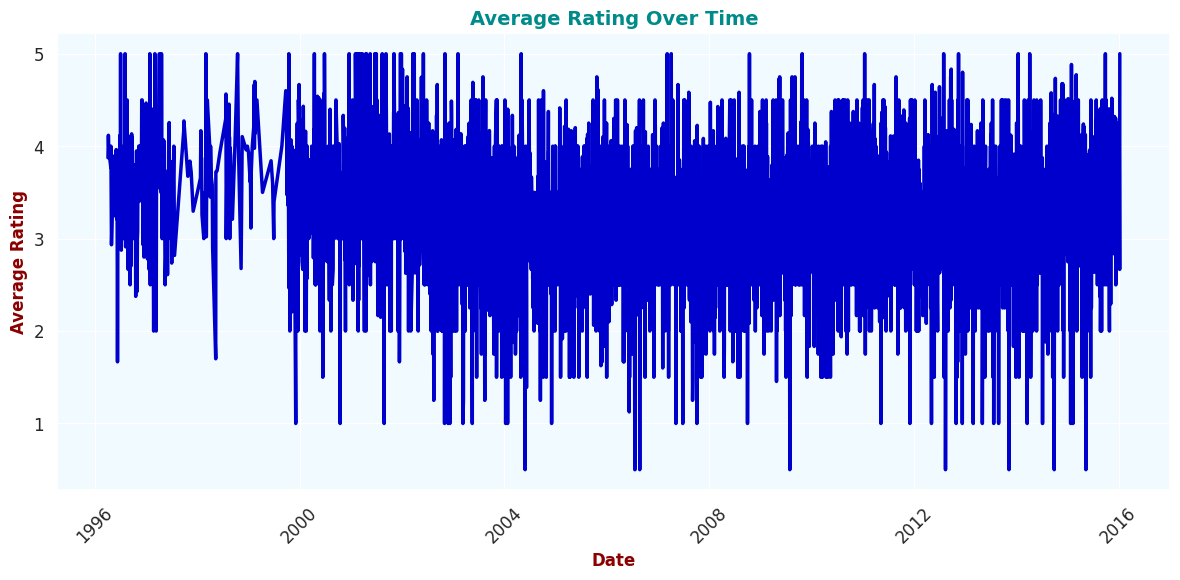

In [21]:
# 7. Rating vs Time (if timestamp is relevant):
ratings_df['datetime'] = pd.to_datetime(ratings_df['timestamp'], unit='s')
ratings_over_time = ratings_df.groupby(ratings_df['datetime'].dt.date)['rating'].mean()
print("Average Ratings Over Time (sample):\n", ratings_over_time.head())

plt.figure(figsize=(12, 6))
plt.plot(ratings_over_time.index, ratings_over_time.values, color='mediumblue', linewidth=2.5)
plt.title('Average Rating Over Time', fontsize=14, fontweight='bold', color='darkcyan')
plt.xlabel('Date', fontsize=12, fontweight='bold', color='darkred')
plt.ylabel('Average Rating', fontsize=12, fontweight='bold', color='darkred')
plt.xticks(rotation=45)
plt.tight_layout()
plt.gca().set_facecolor('#f0faff')
plt.show()


# **4. 📐 Feature Engineering**

- Create new features from your existing data to improve your recommendation system.
- **Combine Movie Features:** Combine the movie's genre, director, and starring actors into a single text string. This will be used for content-based filtering.

In [22]:
# Create a combined feature for content-based filtering
movies_df['combined_features'] = movies_df['genres'] + ' ' + movies_df['director'] + ' ' + movies_df['starring']
movies_df['combined_features'] = movies_df['combined_features'].fillna('')  #Handle any potential NaN after concatenation.


# **5. 🔀 Split the Data**

- **Split your ratings data into two sets:** a training set and a testing set. We use the training set to train our recommendation system and the testing set to evaluate how well it works.




In [23]:
#Splitting data and keeping original data frames.
train_data, test_data = train_test_split(ratings_df, test_size=0.2, random_state=42)


# **6. 🤖 Choose a Model &  7.🏋️ Train the Model**

**Building Recommendation Models:**
- **Content-Based Filtering:**
   - **TF-IDF Vectorization:** Convert the combined movie features into a numerical representation using TF-IDF.
   - **Cosine Similarity:** Calculate how similar each movie is to every other movie based on their TF-IDF vectors.
   - **Recommendation Function:** Create a function that takes a movie title as input and returns a list of movies that are most similar to that movie.


In [24]:
# --- Choose a Model & Train & Evaluate ---

# --- Content-Based Filtering ---

# 1.  TF-IDF Vectorization:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(movies_df['combined_features'])

# 2. Cosine Similarity:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# 3. Recommendation Function:

def content_based_recommendations(movie_title, cosine_sim=cosine_sim, movies_df=movies_df, n=10):
    """
    Recommends movies based on content similarity.

    Args:
        movie_title (str): The title of the movie to base recommendations on.
        cosine_sim (array): Cosine similarity matrix.
        movies_df (DataFrame): The movies DataFrame.
        n (int): The number of recommendations to return.

    Returns:
        DataFrame: DataFrame of recommended movies.
    """
    try:
        idx = movies_df[movies_df['title'] == movie_title].index[0]
    except IndexError:
        return "Movie not found."  # Handle case where movie title doesn't exist

    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:n+1]  # Exclude the movie itself
    movie_indices = [i[0] for i in sim_scores]
    return movies_df['title'].iloc[movie_indices]



- **Collaborative Filtering (Memory-Based):**
  - **User-Item Matrix:** Create a matrix where each row represents a user, each column represents a movie, and each cell contains the rating that the user gave to that movie (fill in missing ratings with 0).
  - **Sparsity Handling:** Convert the user-item matrix to a sparse matrix format to save memory and speed up calculations.
  - **K-Nearest Neighbors Model:** Train a KNN model to find users who are similar to each other based on their movie ratings.
  - **Recommendation Function:** Create a function that takes a user ID as input and returns a list of movies that the user might like, based on the ratings of similar users.

In [25]:
# --- Collaborative Filtering (Memory-Based) ---

# 1.  User-Item Interaction Matrix:
user_item_matrix = ratings_df.pivot_table(index='userId', columns='movieId', values='rating')

# 2.  Sparsity Handling (Crucial for large datasets):
user_item_matrix = user_item_matrix.fillna(0) #or some other strategy

#Convert to sparse matrix for efficient computation
user_item_matrix_sparse = csr_matrix(user_item_matrix)

# 3.  K-Nearest Neighbors Model:
knn_model = NearestNeighbors(metric='cosine', algorithm='brute') # or 'auto' or 'kd_tree'
knn_model.fit(user_item_matrix_sparse)



NearestNeighbors(algorithm='brute', metric='cosine')

In [26]:
# 4.  Collaborative Filtering Recommendation Function:
def collaborative_recommendations(user_id, user_item_matrix=user_item_matrix, knn_model=knn_model, movies_df=movies_df, n=10):
    """
    Recommends movies based on collaborative filtering.

    Args:
        user_id (int): The ID of the user to make recommendations for.
        user_item_matrix (DataFrame): User-item interaction matrix.
        knn_model (NearestNeighbors): Trained KNN model.
        movies_df (DataFrame): The movies DataFrame.
        n (int): The number of recommendations to return.

    Returns:
        DataFrame: DataFrame of recommended movies.
    """
    try:
        user_index = user_item_matrix.index.get_loc(user_id)  # Get index of the user
    except KeyError:
        return "User not found."

    distances, indices = knn_model.kneighbors(user_item_matrix.iloc[user_index,:].values.reshape(1, -1), n_neighbors=n+1) #+1 to exclude the user itself

    similar_users = user_item_matrix.iloc[indices[0][1:], :]  #Exclude the first user which is the target user itself.

    # Calculate the average rating of each movie by similar users
    movie_ratings = similar_users.mean(axis=0)

    #Remove movies already seen by the user.
    movies_watched_by_user = user_item_matrix.iloc[user_index, :]
    movie_ratings[movies_watched_by_user > 0] = -np.inf  # Set rating to -inf for already watched movies

    #Get top N movie recommendations
    top_movie_indices = movie_ratings.nlargest(n).index
    top_movies = movies_df[movies_df['movieId'].isin(top_movie_indices)]['title']

    return top_movies


- **Hybrid Approach:**
  - Combine the results of content-based filtering and collaborative filtering to create a more accurate recommendation system.
  - This may involve using weighted averages of the recommendations from each approach.

In [27]:
# --- Hybrid Approach (Illustrative) ---
# Combine content-based and collaborative filtering.

def hybrid_recommendations(user_id, movie_title, content_weight=0.5, collaborative_weight=0.5, n=10):
    """
    Recommends movies using a hybrid approach.

    Args:
        user_id (int): The ID of the user.
        movie_title (str): A movie title for content-based filtering.
        content_weight (float): Weight for content-based recommendations.
        collaborative_weight (float): Weight for collaborative recommendations.
        n (int): The number of recommendations to return.

    Returns:
        list: A list of recommended movie titles.
    """
    content_recs = content_based_recommendations(movie_title, n=n)
    collaborative_recs = collaborative_recommendations(user_id, n=n)

    #Handle cases where recommendation functions return errors.
    if isinstance(content_recs, str): #Error case, movie not found.
        print("Content-based filtering failed: " + content_recs)
        content_recs = pd.Series([]) # Empty series
    if isinstance(collaborative_recs, str): #Error case, user not found.
         print("Collaborative filtering failed: " + collaborative_recs)
         collaborative_recs = pd.Series([]) # Empty series


    # Combine the recommendations (Illustrative example:  Concatenate and take top N)
    combined_recs = pd.concat([content_recs, collaborative_recs]).head(n)

    return combined_recs.tolist()

## **8. 📈 Evaluate the Model**

- Measure how well your recommendation system works. This usually involves calculating metrics like RMSE (Root Mean Squared Error).
- Evaluate Collaborative filtering, we can evaluate the collaborative filtering model using Root Mean Squared Error (RMSE).
- We can also evaluate our system by manually inspecting the recommendations it generates to see if they make sense.

In [28]:
# --- Evaluate the Model ---
# Evaluation is *critical*.  The methods used here are illustrative.
# Real-world evaluation requires more rigorous offline and online testing.

# **Example Evaluation (Simplified)**

# 1.  Content-Based: Manually inspect recommendations for a few movies.
# 2.  Collaborative:  For users in your test set, predict ratings and compare to actual.

#Collaborative filtering evaluation using RMSE

def evaluate_collaborative_filtering(test_data, user_item_matrix, knn_model):
    """
    Evaluates the collaborative filtering model using Root Mean Squared Error (RMSE).

    Args:
        test_data (DataFrame): The test dataset containing user-movie ratings.
        user_item_matrix (DataFrame): User-item interaction matrix.
        knn_model (NearestNeighbors): Trained KNN model.

    Returns:
        float: RMSE value.
    """
    predictions = []
    actual_ratings = []

    for index, row in test_data.iterrows():
        user_id = row['userId']
        movie_id = row['movieId']
        actual_rating = row['rating']

        try:
            user_index = user_item_matrix.index.get_loc(user_id)
            movie_index = user_item_matrix.columns.get_loc(movie_id) #Get the column index from the user_item_matrix column.

            distances, indices = knn_model.kneighbors(user_item_matrix.iloc[user_index, :].values.reshape(1, -1), n_neighbors=6) # Use 6 neighbors (adjust as needed)

            #Exclude the user themselves
            similar_users = user_item_matrix.iloc[indices[0][1:],:]

            #Get rating from similar users for this movie.
            similar_user_ratings = similar_users[movie_id]
            similar_user_ratings = similar_user_ratings[similar_user_ratings > 0]  # Consider only users who rated the movie

            if not similar_user_ratings.empty:
                predicted_rating = similar_user_ratings.mean()
            else:
                predicted_rating = user_item_matrix.iloc[user_index, :].mean() #If no similar user has rated the movie, use user's average rating


        except KeyError: #If user or movie is not in the training data.
            predicted_rating = user_item_matrix.values.mean() #overall average

        predictions.append(predicted_rating)
        actual_ratings.append(actual_rating)


    rmse = np.sqrt(mean_squared_error(actual_ratings, predictions))
    return rmse




In [29]:
# Content-Based Recommendations:
print("\nContent-Based Recommendations for 'SHUKLOPOKKHO':")
print(content_based_recommendations('SHUKLOPOKKHO'))


Content-Based Recommendations for 'SHUKLOPOKKHO':
21                                AR THEKO NA DURE
158                            Lal Katan Nil Dakat
152                                         REDRUM
146                                       YOUTUMOR
218                                      Mohanagar
231                                        Refugee
80     MONTRI MOHODOYER AGOMON SHUBHECCHA SHAGOTOM
119                 TARA TIN JON HE PRITHIBI BIDAY
122                        TARA TIN JON TEA MASTER
174                                           Bodh
Name: title, dtype: object


In [30]:
# Collaborative Filtering Recommendations:
print("\nCollaborative Filtering Recommendations for User 1:")
print(collaborative_recommendations(1))


Collaborative Filtering Recommendations for User 1:
113                  KHELAGHOR
114                      DAHAN
115                 JOAR BHATA
116                ALOR MICHIL
117    SERIOUS EKTA KOTHA ACHE
118                       FAUL
120               LOSS PROJECT
123              TINER TALOWAR
124                   MAYABOTI
125                     ADHIAR
Name: title, dtype: object


In [31]:
# Hybrid Recommendations:
print("\nHybrid Recommendations for User 1 based on 'SHUKLOPOKKHO':")
print(hybrid_recommendations(1, 'SHUKLOPOKKHO'))


Hybrid Recommendations for User 1 based on 'SHUKLOPOKKHO':
['AR THEKO NA DURE', 'Lal Katan Nil Dakat', 'REDRUM', 'YOUTUMOR', 'Mohanagar', 'Refugee', 'MONTRI MOHODOYER AGOMON SHUBHECCHA SHAGOTOM', 'TARA TIN JON HE PRITHIBI BIDAY', 'TARA TIN JON TEA MASTER', 'Bodh']


In [32]:
#Evaluate Collaborative filtering.
rmse_score = evaluate_collaborative_filtering(test_data, user_item_matrix, knn_model)
print(f"\nCollaborative Filtering RMSE: {rmse_score}")



Collaborative Filtering RMSE: 1.0825871115584313


# **9. 🔧 Improve the Model**

- Hyperparameter tuning for KNN (number of neighbors, metric)
- Trying different collaborative filtering algorithms (e.g., SVD)
- More sophisticated hybrid approaches (weighted averaging, stacking)
- Feature engineering (e.g., using movie plot summaries if available)
- Handling cold start problems (new users, new movies)
- Regularization techniques


### ***See it in the Movie Recommendation System_ Model Improvement.ipynb***

# **10. 🚀 Deploy the Model (optional)**

- This involves creating an API or application that uses the trained model
- to generate recommendations in real-time.  